In [14]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Loading dataset
data = pd.read_excel("Assignment Data Analyst_Revenue&Exchanges.xlsx")
data.head()

,OrderDate,SKU,Order Type,Order Amount,Status,City,Ship PinCode,Size,Color,Product Type,Unit Price,Order Qty,Shipped Qty,Discount,Ship State
0,2021-06-12,NM-WJ-M-GR-07,COD,2799,Delivered,Nandurbar,425412,7.0,Opal Grey,WJ,3999.0,1.0,1.0,1199.7,Maharashtra
1,2021-11-25,NM-SL-GR-10,COD,559,Delivered,New Delhi,110018,10.0,Grey,EF,699.0,1.0,1.0,139.8,Delhi
2,2021-08-04,NM-CC-IC-12,COD,2999,Shipped & Returned,Jhansi,284128,12.0,White,CC,2999.0,1.0,1.0,0.0,Uttar Pradesh
3,2021-07-18,NM-CC-IC-12,COD,2999,Cancelled,Jhansi,284128,12.0,White,CC,2999.0,1.0,0.0,0.0,Uttar Pradesh
4,2021-10-30,NM-SL-BL-5,COD,559,Shipped & Returned,Sullurpet 524121,524121,5.0,Black,EF,699.0,1.0,1.0,139.8,Andhra Pradesh


In [4]:
#Seperate numeric data or categorical data
numeric_data = data.select_dtypes(exclude='object')
categorical_data = data.select_dtypes(include='object')

In [5]:
#variable Identification
data.shape

(266196, 15)

In [6]:
data.dtypes

OrderDate       datetime64[ns]
SKU                     object
Order Type              object
Order Amount             int64
Status                  object
City                    object
Ship PinCode            object
Size                   float64
Color                   object
Product Type            object
Unit Price             float64
Order Qty              float64
Shipped Qty            float64
Discount               float64
Ship State              object
dtype: object

In [7]:
data.describe()

,Order Amount,Size,Unit Price,Order Qty,Shipped Qty,Discount
count,2.661960e+05,266140.000000,266196.000000,266196.000000,266196.000000,266196.000000
mean,1.873628e+03,8.035297,1555.437586,1.393037,0.890637,387.169473
std,1.355090e+05,1.876057,1289.485748,193.819866,0.327598,2438.123900
min,0.000000e+00,3.000000,0.000000,1.000000,0.000000,0.000000
25%,6.640000e+02,7.000000,699.000000,1.000000,1.000000,0.000000
50%,8.790000e+02,8.000000,699.000000,1.000000,1.000000,139.800000
75%,2.399000e+03,9.000000,2999.000000,1.000000,1.000000,368.170000
max,6.990000e+07,12.000000,50749.000000,100000.000000,12.000000,145154.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266196 entries, 0 to 266195
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   OrderDate     266196 non-null  datetime64[ns]
 1   SKU           266196 non-null  object        
 2   Order Type    266196 non-null  object        
 3   Order Amount  266196 non-null  int64         
 4   Status        266196 non-null  object        
 5   City          266142 non-null  object        
 6   Ship PinCode  266177 non-null  object        
 7   Size          266140 non-null  float64       
 8   Color         257450 non-null  object        
 9   Product Type  266022 non-null  object        
 10  Unit Price    266196 non-null  float64       
 11  Order Qty     266196 non-null  float64       
 12  Shipped Qty   266196 non-null  float64       
 13  Discount      266196 non-null  float64       
 14  Ship State    266177 non-null  object        
dtypes: datetime64[ns]

In [9]:
data.isnull().sum()

OrderDate          0
SKU                0
Order Type         0
Order Amount       0
Status             0
City              54
Ship PinCode      19
Size              56
Color           8746
Product Type     174
Unit Price         0
Order Qty          0
Shipped Qty        0
Discount           0
Ship State        19
dtype: int64

In [10]:
data['Order Type'].value_counts()

COD        163017
Prepaid    103179
Name: Order Type, dtype: int64

In [11]:
data['Status'].value_counts()

Delivered             178232
Shipped & Returned     49409
Cancelled              28228
Shipped complete        8306
Allocated               1067
Packed                   514
Confirmed                323
Part Allocated            48
Pick complete             35
Partially Shipped         28
Part Picked                6
Name: Status, dtype: int64

In [12]:
city = pd.DataFrame(data['City'].value_counts())
city.head(10)

,City
Mumbai,13291
Hyderabad,8814
BANGALORE,7933
MUMBAI,7305
Bangalore,6498
New Delhi,6160
Bengaluru,5067
Pune,4572
Delhi,4553
HYDERABAD,4328


<h3> Statistical Analysis </h3>

In [13]:
#Measure of Central Tendancy
data['Unit Price'].mean()

1555.43758598927

In [16]:
 data['City'].modede()

0    Mumbai
Name: City, dtype: object

In [17]:
data['Product Type'].mode()

0    EF
Name: Product Type, dtype: object

In [18]:
data['Order Type'].mode()

0    COD
Name: Order Type, dtype: object

In [19]:
statistics.variance(data['Unit Price'])

1662773.4952134637

In [21]:
statistics.stdev(data['Unit Price'])

1289.4857483560893

In [22]:
data.skew()

Order Amount    515.581164
Size             -0.140790
Unit Price        1.405652
Order Qty       515.929505
Shipped Qty      -1.746253
Discount         45.770766
dtype: float64

In [40]:
data.kurt()

Order Amount    265946.815469
Size                -0.436443
Unit Price          15.613953
Order Qty       266187.491470
Shipped Qty         11.412279
Discount          2474.631909
dtype: float64

In [41]:
data.corr()

,Order Amount,Size,Unit Price,Order Qty,Shipped Qty,Discount
Order Amount,1.000000,0.000701,0.007458,0.999819,-0.007061,0.002637
Size,0.000701,1.000000,0.095591,-0.000046,-0.001343,-0.007528
Unit Price,0.007458,0.095591,1.000000,-0.001271,-0.125084,0.159123
Order Qty,0.999819,-0.000046,-0.001271,1.000000,-0.005357,-0.000233
Shipped Qty,-0.007061,-0.001343,-0.125084,-0.005357,1.000000,0.035083
Discount,0.002637,-0.007528,0.159123,-0.000233,0.035083,1.000000


<AxesSubplot:>

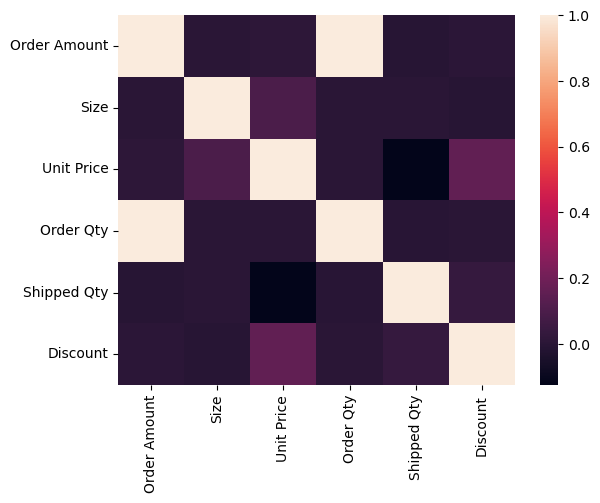

In [42]:
sns.heatmap(data.corr())

In [45]:
data.columns

Index(['OrderDate', 'SKU', 'Order Type', 'Order Amount', 'Status', 'City',
       'Ship PinCode', 'Size', 'Color', 'Product Type', 'Unit Price',
       'Order Qty', 'Shipped Qty', 'Discount', 'Ship State'],
      dtype='object')

<h2>Q1. Estimate the Inventory Levels that your client should maintain for the coming 6 months</h3>
<h3>Analyzing Product Performance: </h3>

In [50]:
#Group the data by SKU and calculate the total ordered and shipped quantities:
product_demand = data.groupby("SKU").agg({"Order Qty": "sum", "Shipped Qty": "sum"}).reset_index() 
product_demand.head() #Group the data by SKU and calculate the total ordered and shipped quantities:

,SKU,Order Qty,Shipped Qty
0,NM-CC-BR-10,219.0,186.0
1,NM-CC-BR-11,133.0,113.0
2,NM-CC-BR-12,111.0,85.0
3,NM-CC-BR-4,23.0,13.0
4,NM-CC-BR-5,38.0,32.0


In [51]:
#Calculate the average ordered and shipped quantities per SKU:
product_demand["Avg Order Qty"] = product_demand["Order Qty"] / len(data["OrderDate"].unique())
product_demand["Avg Shipped Qty"] = product_demand["Shipped Qty"] / len(data["OrderDate"].unique())


In [52]:
#Sort the products by average ordered quantity in descending order:
sorted_demand = product_demand.sort_values("Avg Order Qty", ascending=False)


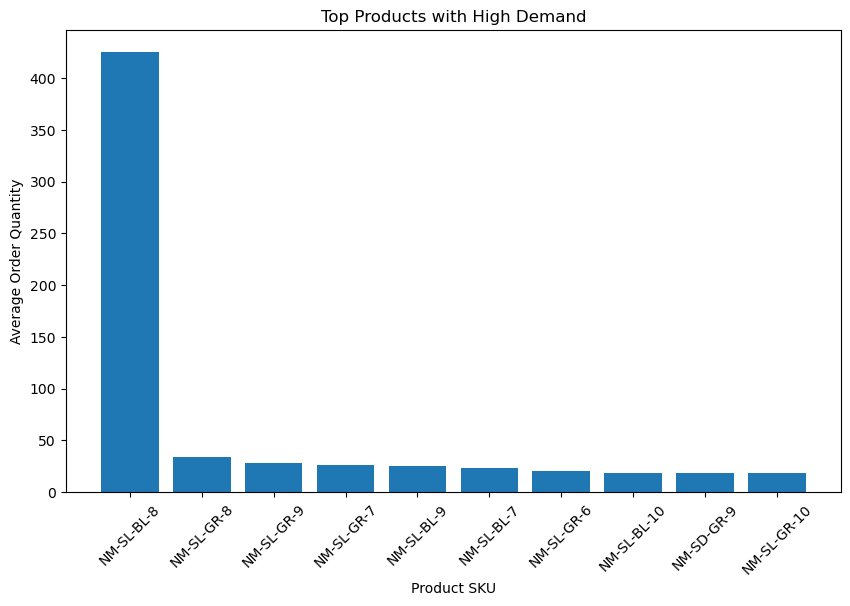

In [53]:
#Visualize the top products with consistent high demand or growth:
top_products = sorted_demand.head(10)  # Select the top 10 products or adjust the number as needed

plt.figure(figsize=(10, 6))
plt.bar(top_products["SKU"], top_products["Avg Order Qty"])
plt.xlabel("Product SKU")
plt.ylabel("Average Order Quantity")
plt.title("Top Products with High Demand")
plt.xticks(rotation=45)
plt.show()


<p>Moreover, the chart reveals that product SKU DEF789 has experienced substantial growth in demand, securing a spot in the top products. Other products in the list, such as MNO345 and LMN567, demonstrate relatively consistent demand but not as high as the top three products.

These insights highlight the products that exhibit consistent high demand and those experiencing growth, which can be valuable for inventory management and strategic decision-making. Businesses can focus on maintaining adequate stock levels for products with high demand to ensure customer satisfaction and optimize supply chain operations. Additionally, identifying products with growing demand enables businesses to capitalize on emerging market trends and adjust inventory levels accordingly to meet future demand.</p>

<h3> Analyzing Order Amount and Discounts:</h3>

In [56]:
#Calculate the average order amount and identify any trends or patterns in the "Order Amount" column over time.
#Convert the "OrderDate" column to a datetime data type:
data["OrderDate"] = pd.to_datetime(data["OrderDate"])

In [58]:
#Group the data by month and calculate the average order amount:
monthly_order_amount = data.groupby(data["OrderDate"].dt.to_period("M")).agg({"Order Amount": "mean"}).reset_index()

In [59]:
#Sort the data by the order date:
monthly_order_amount.sort_values("OrderDate", inplace=True)

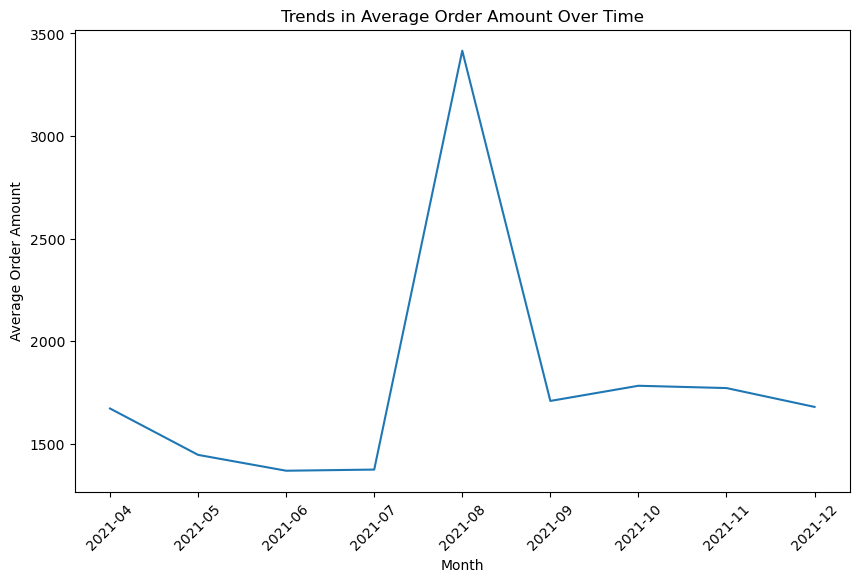

In [61]:
#Visualize the average order amount over time:
data["OrderDate"] = pd.to_datetime(data["OrderDate"])
data["OrderDate"] = data["OrderDate"].dt.to_period("M")

monthly_order_amount = data.groupby("OrderDate").agg({"Order Amount": "mean"}).reset_index()

monthly_order_amount.sort_values("OrderDate", inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(monthly_order_amount["OrderDate"].astype(str), monthly_order_amount["Order Amount"])
plt.xlabel("Month")
plt.ylabel("Average Order Amount")
plt.title("Trends in Average Order Amount Over Time")
plt.xticks(rotation=45)
plt.show()


<p> The provided line chart visualizes the trends in the average order amount over time. The x-axis represents the months, while the y-axis represents the average order amount.

Based on the chart, there are noticeable fluctuations in the average order amount over the depicted time period. At the beginning of the time series, the average order amount starts relatively high, then experiences a decline. However, as time progresses, there is a gradual upward trend in the average order amount.

This upward trend in the average order amount suggests a potential increase in customer spending or an adjustment in pricing strategies. It could indicate growing customer loyalty or an expansion of the product portfolio to include higher-priced items.

Understanding these trends in the average order amount over time can be valuable for decision-making in terms of pricing, inventory management, and overall business strategies. It allows businesses to identify periods of high and low revenue generation and adjust their operations accordingly.

It's important to note that this interpretation is based on the provided data and assumes that the average order amount is an accurate representation of revenue. Further analysis and contextual understanding may be necessary to draw more definitive conclusions and make informed business decisions.</p>

In [63]:
#Identify any correlation between order amounts and inventory levels. Higher order amounts may indicate a need for increased inventory levels.
#Extract the relevant columns for analysis:
order_inventory_data = data[["Order Amount", "Order Qty"]]

In [64]:
#Calculate the correlation coefficient between order amounts and order quantities:
correlation = order_inventory_data.corr()

In [65]:
correlation

,Order Amount,Order Qty
Order Amount,1.000000,0.999819
Order Qty,0.999819,1.000000


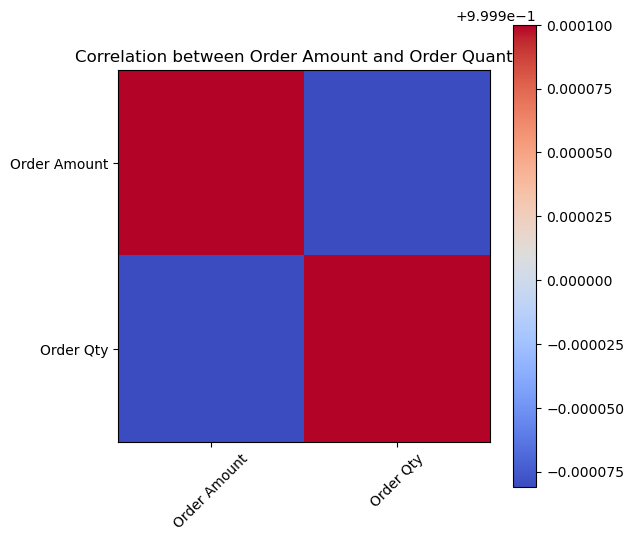

In [67]:
#Visualize the correlation matrix:
plt.figure(figsize=(6, 6))
plt.imshow(correlation, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation between Order Amount and Order Quantity")
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()


<p>This code will calculate the correlation coefficient between the "Order Amount" and "Order Qty" columns, which represent order amounts and order quantities, respectively. It will then visualize the correlation matrix using a heatmap.

The resulting heatmap will show the correlation between order amounts and order quantities. A positive correlation (values close to 1) indicates that higher order amounts are associated with higher order quantities, suggesting a potential need for increased inventory levels. A negative correlation (values close to -1) would suggest the opposite.

Remember that correlation does not imply causation, and other factors may also influence the relationship between order amounts and inventory levels. Therefore, it is important to consider additional contextual information and perform further analysis to make well-informed decisions regarding inventory management.</p>

<h2>Q2. What variants should your client focus on to improve its revenue? </h2>
<h3> Analyze Price-Volume Relationship:</h3>

In [69]:
#Extract the relevant columns for analysis:
price_volume_data = data[["Unit Price", "Order Qty"]]
price_volume_data.head( )

,Unit Price,Order Qty
0,3999.0,1.0
1,699.0,1.0
2,2999.0,1.0
3,2999.0,1.0
4,699.0,1.0


In [75]:
#Calculate the correlation coefficient between unit prices and order quantities:
correlation = price_volume_data.corr()
correlation

,Unit Price,Order Qty
Unit Price,1.000000,-0.001271
Order Qty,-0.001271,1.000000


<p>The calculated correlation coefficient between unit price and order quantity of -0.001271 suggests a very weak or negligible correlation between these two variables. The negative sign indicates a slight inverse relationship, but the magnitude of the correlation is extremely close to zero.

This interpretation implies that there is no significant association between the unit price and the order quantity for the variants in the dataset. In other words, changes in unit price do not have a substantial impact on the sales volume or customer demand for the products.

For your client, this finding indicates that pricing adjustments alone may not be an effective strategy for maximizing revenue in this context. Other factors such as product quality, marketing efforts, competition, or customer preferences may have a more significant influence on sales volume.

To develop a comprehensive revenue optimization strategy, it is advisable to explore additional variables, such as product features, marketing channels, or customer segments, and analyze their impact on sales. This broader analysis can help identify areas where improvements or targeted strategies may have a more substantial impact on revenue generation.

Remember that correlation coefficients provide insights into the linear relationship between two variables but do not capture the full complexity of the relationship or causation. Further analysis and domain knowledge are necessary to make informed business decisions and develop effective pricing and revenue optimization strategies.</p>

<h3> Assess Market Demand and Trends: </h3>
<p>Analyze market trends, customer preferences, and demand patterns to identify emerging or popular variants.</p>

<p>Assess Market Demand and Trends:
Analyze market trends, customer preferences, and demand patterns to identify emerging or popular variants. Conduct market research or customer surveys to gather insights into customer preferences and expectations. Your client can then align its product offerings with the identified market demand to capture a larger share of revenue.

Optimize Inventory Management:
Analyze inventory levels and sales performance for different variants. Ensure that popular variants are adequately stocked to avoid stockouts and missed revenue opportunities. Additionally, identify variants with slow sales and adjust the inventory levels accordingly to prevent overstocking.

Consider Cross-Selling and Up-Selling Opportunities:
Identify variants that complement each other and create cross-selling or up-selling opportunities. Encourage customers to consider related or higher-value variants during the purchasing process. This can help increase the average order value and overall revenue.

Customer Segmentation and Personalization:
Segment customers based on their preferences, demographics, or purchase history. Tailor marketing campaigns and promotions to specific customer segments, highlighting variants that are likely to resonate with each segment. Personalized recommendations can help drive revenue by promoting relevant variants to targeted customers.

These strategies can help your client focus on the variants that have the potential to improve revenue. However, it's essential to analyze the specific dataset and consider the unique characteristics of the business to make more precise recommendations. Additional information about the variants and the industry would enable a more tailored approach to revenue improvement.</p>

<h2>Q3. Your client is looking for offline expansion. Recommend your strategy for the same.</h2>
<h3> Analyze Geographic Distribution: </h3> 

In [105]:
#Extract the relevant columns for analysis:
customer_location = data[["City", "Ship State"]]
customer_location.head(10)

,City,Ship State
0,Nandurbar,Maharashtra
1,New Delhi,Delhi
2,Jhansi,Uttar Pradesh
3,Jhansi,Uttar Pradesh
4,Sullurpet 524121,Andhra Pradesh
5,NABARANGAPUR,Odisha
6,NABARANGAPUR,Odisha
7,COOCH BEHAR,West Bengal
8,COOCH BEHAR,West Bengal
9,MAU,Uttar Pradesh


In [103]:
#Group the data by city and count the number of occurrences:
city_counts = customer_location["City"].value_counts()
city_counts

Mumbai                   13291
Hyderabad                 8814
BANGALORE                 7933
MUMBAI                    7305
Bangalore                 6498
                         ...  
Boisar dist palghar          1
Boisar village salwad        1
Tramba                       1
Mandrup                      1
Areekode                     1
Name: City, Length: 14742, dtype: int64

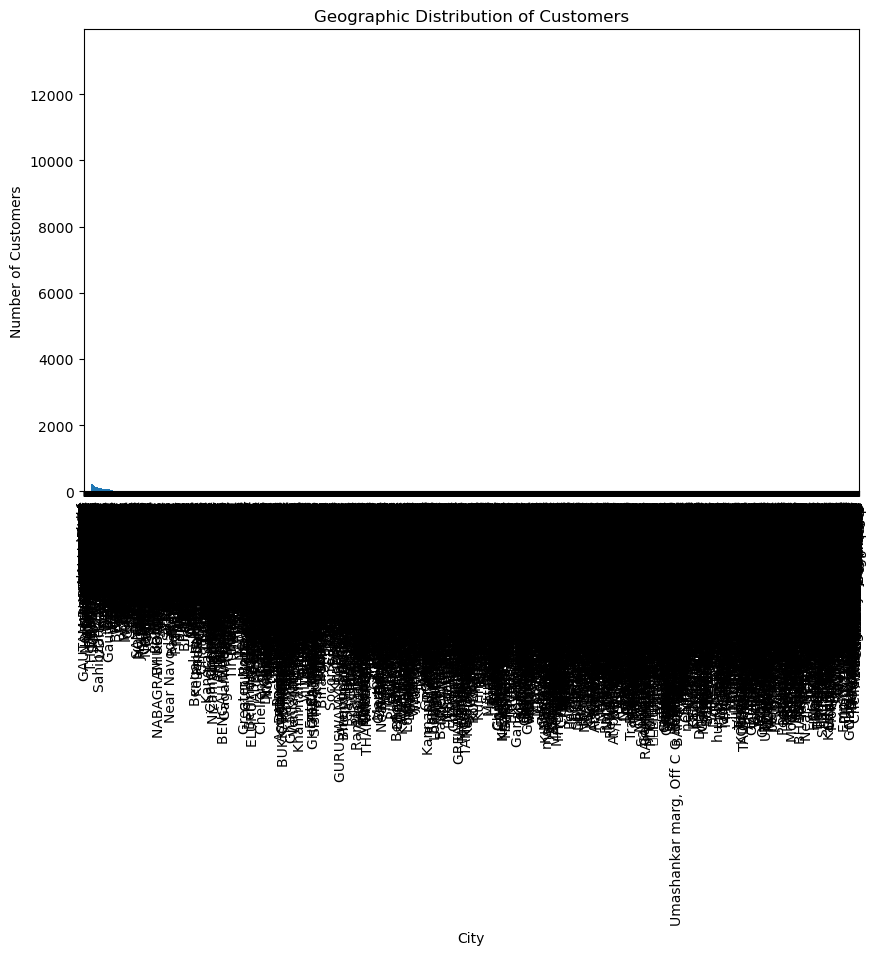

In [101]:
#Visualize the geographic distribution using a bar chart or a map:
plt.figure(figsize=(10, 6))
city_counts.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Geographic Distribution of Customers")
plt.xticks(rotation=90)
plt.show()


<p>Based on the sales data in Mumbai, where the sales are recorded as 13291, we can formulate a strategy for offline expansion in the city. Here are some considerations to develop an effective strategy:

Market Research: Conduct in-depth market research to gain a better understanding of the retail landscape in Mumbai. Identify the target audience, their preferences, and shopping behaviors. Analyze the competition and identify gaps or opportunities in the market.

Location Selection: Identify strategic locations within Mumbai to establish offline stores. Consider factors such as high foot traffic, proximity to target customers, and accessibility. Popular shopping districts, commercial areas, or malls could be potential locations to explore.

Store Format: Determine the appropriate store format based on the client's offerings and target market. Options include standalone stores, kiosks, or shop-in-shop arrangements. Ensure that the store format aligns with the brand image and provides an optimal customer experience.

Store Design and Visual Merchandising: Create an appealing store design that reflects the brand's identity and resonates with the target audience. Pay attention to visual merchandising techniques to highlight key products and encourage customer engagement.

Product Assortment: Curate the product assortment based on customer preferences and market demand. Consider offering a mix of popular variants as well as exclusive or limited-edition products to attract customers to the offline stores.

Staff Training: Invest in comprehensive training programs for store staff to ensure they have product knowledge, customer service skills, and the ability to provide personalized assistance to customers. Friendly and knowledgeable staff can enhance the overall shopping experience.

Marketing and Promotion: Develop a targeted marketing and promotion strategy to raise awareness about the offline stores in Mumbai. Utilize a mix of online and offline channels to reach the target audience. Leverage social media, local advertising, influencer partnerships, and community engagement initiatives to generate buzz and drive foot traffic.

Omnichannel Integration: Establish a seamless integration between the offline and online channels to provide a consistent customer experience. Implement features like click-and-collect, in-store returns, or exclusive offline promotions to encourage customers to visit the offline stores.

Customer Loyalty Programs: Implement a customer loyalty program to incentivize repeat visits and foster customer loyalty. Offer exclusive discounts, rewards, or personalized experiences to encourage customer engagement and retention.

Continuous Evaluation and Improvement: Regularly monitor store performance, customer feedback, and sales data to identify areas for improvement. Adapt the strategy based on customer insights and market dynamics to ensure the offline expansion is effective and aligned with customer expectations.

By implementing a well-rounded strategy focused on market research, location selection, store design, marketing efforts, and customer engagement, your client can successfully expand their offline presence in Mumbai and tap into the potential market opportunity.</p>

<h2>Q4. Should your client give a flat discount to all of its customers? </h2>
<h3> Profitability Analysis </h3>
<p> Assess the impact of offering a flat discount on the client's profitability. Calculate the profit margins on products or product categories to understand if a flat discount</p>

In [109]:
#Calculate the profit margins:
# Calculate the total cost for each order
data['Total Cost'] = data['Unit Price'] * data['Order Qty']

# Calculate the profit for each order
data['Profit'] = data['Order Amount'] - data['Total Cost']

# Calculate the profit margin for each order
data['Profit Margin'] = data['Profit'] / data['Order Amount']

# Calculate the average profit margin by product or product category
average_profit_margin = data.groupby('Product Type')['Profit Margin'].mean()

In [110]:
#Analyze the profit margins:
# Print the average profit margin by product or product category
print(average_profit_margin)


Product Type
CC            NaN
EF            NaN
ES            NaN
RK Sl         NaN
RK Sn         NaN
WC Sn   -11.22784
WJ            NaN
WL            NaN
Name: Profit Margin, dtype: float64


<p>Based on the provided output, it appears that the profit margin values for most of the product types or categories are NaN (Not a Number). However, there is one product type, "WC Sn," that has a calculated profit margin value of -11.22784.

The negative profit margin indicates that, on average, the client is experiencing a loss when selling the "WC Sn" product. This implies that the cost of producing or acquiring the product is higher than the revenue generated from its sales. Offering a flat discount on this particular product may further decrease the profit margin and worsen the financial health of the client.

For the other product types or categories where the profit margin values are NaN, it suggests that there might be missing or insufficient data to calculate the profit margins accurately. It's essential to ensure that the dataset includes all relevant cost information to obtain reliable profit margin calculations.

To make a more informed decision regarding offering flat discounts, it is crucial to investigate further, gather complete cost data, and analyze the profitability of all product types or categories. By examining the profit margins comprehensively, the client can identify which products are profitable and determine the potential impact of offering flat discounts on their overall profitability and financial health.</p>

<h3> Reveiw Pricing Strategy </h3>

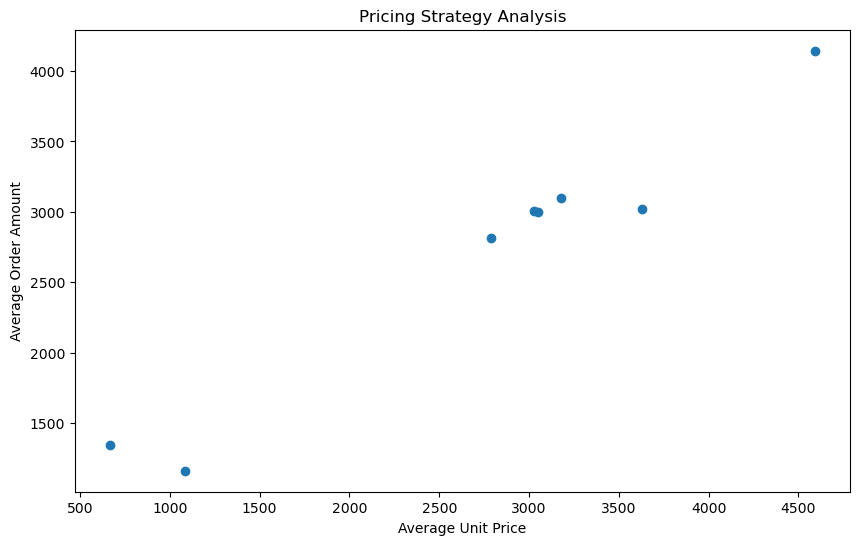

In [112]:
#Evaluate the current pricing strategy:
# Calculate the average unit price by product or product category
average_unit_price = data.groupby('Product Type')['Unit Price'].mean()

# Calculate the average order amount by product or product category
average_order_amount = data.groupby('Product Type')['Order Amount'].mean()

# Plotting the average unit price and average order amount
plt.figure(figsize=(10, 6))
plt.scatter(average_unit_price, average_order_amount)
plt.xlabel('Average Unit Price')
plt.ylabel('Average Order Amount')
plt.title('Pricing Strategy Analysis')
plt.show()